Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
import shutil
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Rescaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import load_img

### Load Images using keras.preprocessingutils.image_dataset_from_directory



In [2]:
# Defining the path for train and test images
#from google.colab import drive
#drive.mount('/content/drive')

import pathlib
train_data_path = pathlib.Path("./data/Train/")
test_data_path = pathlib.Path("./data/Test/")


### Create a dataset
#### Use 80% of the images for training, and 20% for validation.
Define some parameters for the loader:

In [3]:
# Define constant for Batch size and Image Size
batch_size = 32
img_height = 180
img_width = 180

In [4]:
# Load images to Train dataset (80%)
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [5]:
# Load images to Validatiom dataset (20%)
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [6]:
# Get class names
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data

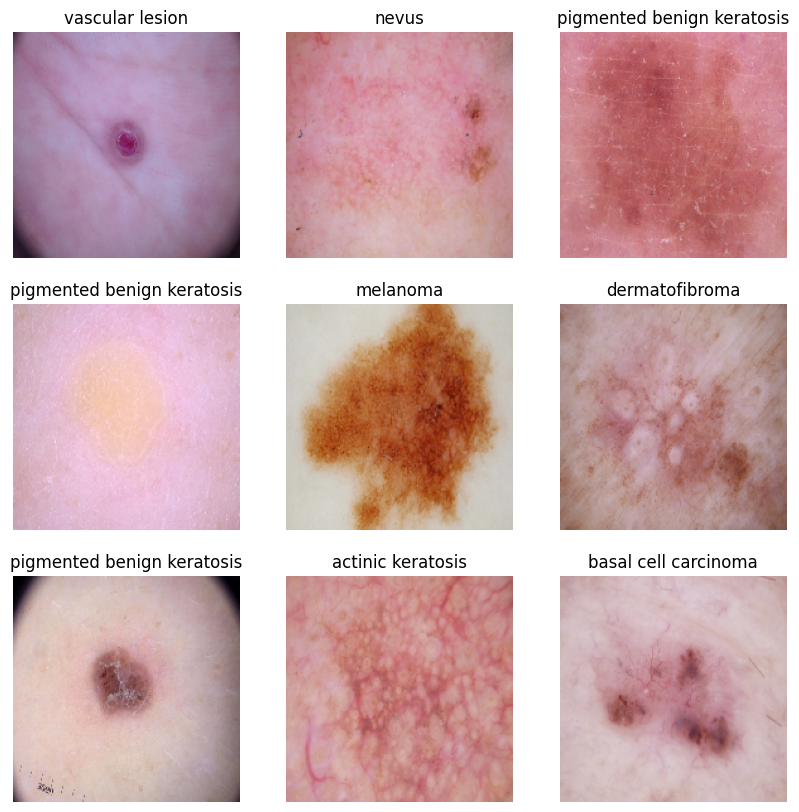

In [7]:
#Visualize one instance of all the class present in the dataset.
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
# Print shape of Train dataset
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [9]:
#Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.
#Dataset.prefetch()` overlaps data preprocessing and model execution while training.

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Model Building & training
  

*   Creating a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescaling images to normalize pixel values between (0,1).
*   Choosing an appropriate optimiser and loss function for model training
*   Training the model for ~20 epochs
*   Plotting Graph for findings after the model fit to check if there is any evidence of model overfit or underfit.












In [10]:
# Define input shape
input_shape = (180, 180, 3)

# CNN Model
model = models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(1./255,input_shape=input_shape))

# Convolution layer with 32 features, 3x3 filter and relu activation with 2x2 pooling
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
# Use softmax as activation method
model.add(Dense(9, activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [11]:
# Compiling the model
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

In [12]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 128)       0

In [13]:
# Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 22s 135ms/step - loss: 2.0400 - accuracy: 0.2182 - val_loss: 1.8936 - val_accuracy: 0.3043
Epoch 2/20
56/56 [==============================] - 4s 79ms/step - loss: 1.7693 - accuracy: 0.3644 - val_loss: 1.7208 - val_accuracy: 0.4430
Epoch 3/20
56/56 [==============================] - 4s 78ms/step - loss: 1.5148 - accuracy: 0.4810 - val_loss: 1.5211 - val_accuracy: 0.4966
Epoch 4/20
56/56 [==============================] - 4s 78ms/step - loss: 1.4173 - accuracy: 0.5162 - val_loss: 1.4731 - val_accuracy: 0.5213
Epoch 5/20
56/56 [==============================] - 4s 78ms/step - loss: 1.3314 - accuracy: 0.5324 - val_loss: 1.3987 - val_accuracy: 0.5526
Epoch 6/20
56/56 [==============================] - 4s 78ms/step - loss: 1.3140 - accuracy: 0.5396 - val_loss: 1.4267 - val_accuracy: 0.5369
Epoch 7/20
56/56 [==============================] - 4s 78ms/step - loss: 1.2107 - accuracy: 0.5792 - val_loss: 1.4871 - val_accuracy: 0.5280
Epoch 8/20


### Visualizing training results

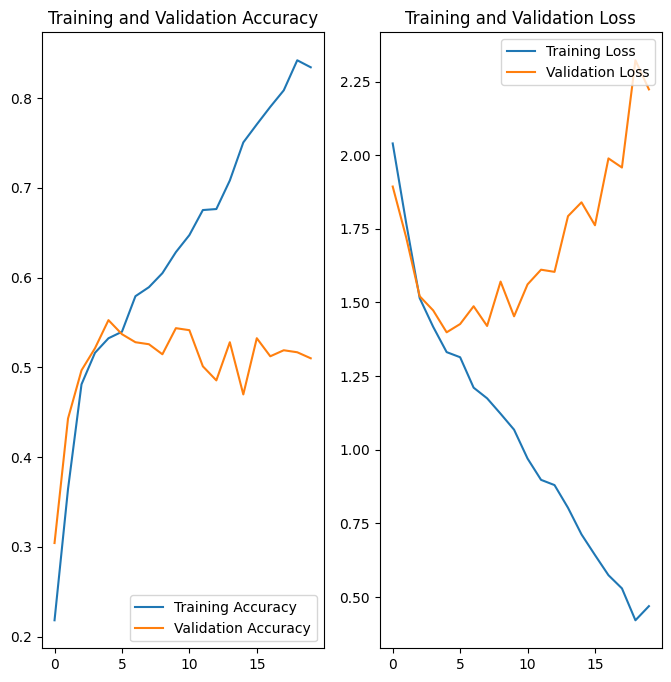

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

Findings:


*   Training Performance: The model achieves a reasonably good training accuracy of 0.8328 and a loss of 0.4596, indicating that it's learning from the training data

*   Validation Performance: The validation accuracy of 0.5324 and a high validation loss of 2.1122 suggest a significant overfitting issue. The model is performing well on the training data but struggles to generalize to unseen data.

*   As the training loss decreases  with epochs the validation loss increases

*   The plots show that training accuracy and validation accuracy are off by large margins, and the model has achieved around 53% accuracy on the validation set.
*   The difference in accuracy between training and validation accuracy is noticeable which is a sign of **overfitting**









#### Choosing an appropriate data augmentation strategy to resolve overfitting
Overfitting generally occurs when there are a small number of training examples. Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

In [15]:
# As part of data augmentation we are rescaling images to 100x100 size
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(200, 200),
  layers.Rescaling(1./255)
])

In [16]:
# As part of data augmentation we are performing Flip / Rotation and Contrast of images
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.1),
  layers.RandomContrast(0.1)
])

In [17]:
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets.
  #ds = ds.map(lambda x, y: (resize_and_rescale(x), y),
   #           num_parallel_calls=AUTOTUNE)

  # Use data augmentation only on the training set.
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y),
                num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)

In [18]:
train_ds_aug = prepare(train_ds, shuffle=True, augment=True)
val_ds_aug = prepare(val_ds)
#test_ds = prepare(test_ds)

### Model Building & training (After data augmentation)
  

*   Creating a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescaling images to normalize pixel values between (0,1).
*   Choosing an appropriate optimiser and loss function for model training
*   Training the model for ~20 epochs
*   Plotting Graph for findings after the model fit to check if there is any evidence of model overfit or underfit.

In [19]:
# Define input shape
input_shape = (180, 180, 3)

# CNN Model
model = models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(1./255,input_shape=input_shape))

# Convolution layer with 32 features, 3x3 filter and relu activation with 2x2 pooling
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
# Use softmax as activation method
model.add(Dense(9, activation='softmax'))

In [20]:
# Compile the model
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

In [21]:
# View the summary of all layers
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 41, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 20, 20, 128)      

In [22]:
# Training the model
epochs = 20
history = model.fit(
  train_ds_aug,
  validation_data=val_ds_aug,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 9s 83ms/step - loss: 2.1275 - accuracy: 0.2628 - val_loss: 1.8084 - val_accuracy: 0.3043
Epoch 2/20
56/56 [==============================] - 8s 81ms/step - loss: 1.7368 - accuracy: 0.3811 - val_loss: 1.7914 - val_accuracy: 0.3579
Epoch 3/20
56/56 [==============================] - 7s 80ms/step - loss: 1.6078 - accuracy: 0.4302 - val_loss: 1.5264 - val_accuracy: 0.4474
Epoch 4/20
56/56 [==============================] - 8s 81ms/step - loss: 1.5224 - accuracy: 0.4559 - val_loss: 1.4839 - val_accuracy: 0.4765
Epoch 5/20
56/56 [==============================] - 7s 80ms/step - loss: 1.4676 - accuracy: 0.4766 - val_loss: 1.3748 - val_accuracy: 0.5280
Epoch 6/20
56/56 [==============================] - 8s 81ms/step - loss: 1.3831 - accuracy: 0.5106 - val_loss: 1.4089 - val_accuracy: 0.5190
Epoch 7/20
56/56 [==============================] - 8s 79ms/step - loss: 1.3310 - accuracy: 0.5301 - val_loss: 1.4521 - val_accuracy: 0.5056
Epoch 8/20
56

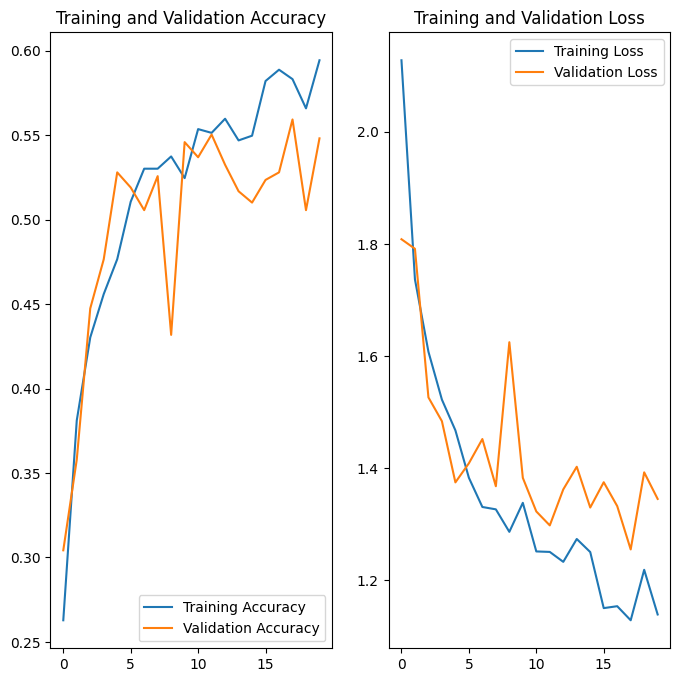

In [23]:
# Visualizing training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Findings:


*   As the training accuracy increases linearly over time, where as the validation accuracy stall at 55% accuracy in training process.
*   As the training loss decreases with epochs the validation loss increases

*   The plots show that training accuracy and validation accuracy are off by some margins, and the model has achieved around 57% accuracy on the validation set. 57% accuracy is low
*   This could indicate a lack of overfitting, but it also suggests that the model may not be capturing the underlying patterns in the data effectively.

# Model Building & training on the augmented data with dropout :

In [24]:
# Define input shape
input_shape = (180, 180, 3)

# CNN Model
model = models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(1./255,input_shape=input_shape))

# Convolution layer with 32 features, 3x3 filter and relu activation with 2x2 pooling
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
#adding a 20% dropout after the convolution layers
model.add(layers.Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
# Use softmax as activation method
model.add(Dense(9, activation='softmax'))

In [25]:
# Compile the model
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

In [26]:
# View the summary of all layers
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 41, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 20, 20, 128)      

In [27]:
# Training the model
epochs = 20
history = model.fit(
  train_ds_aug,
  validation_data=val_ds_aug,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 9s 84ms/step - loss: 2.0515 - accuracy: 0.2310 - val_loss: 2.0196 - val_accuracy: 0.1946
Epoch 2/20
56/56 [==============================] - 8s 81ms/step - loss: 1.8382 - accuracy: 0.3209 - val_loss: 1.7425 - val_accuracy: 0.3870
Epoch 3/20
56/56 [==============================] - 8s 81ms/step - loss: 1.5823 - accuracy: 0.4286 - val_loss: 1.5095 - val_accuracy: 0.4877
Epoch 4/20
56/56 [==============================] - 8s 81ms/step - loss: 1.4498 - accuracy: 0.4860 - val_loss: 1.4621 - val_accuracy: 0.4609
Epoch 5/20
56/56 [==============================] - 8s 81ms/step - loss: 1.4223 - accuracy: 0.4927 - val_loss: 1.4340 - val_accuracy: 0.4877
Epoch 6/20
56/56 [==============================] - 8s 81ms/step - loss: 1.3872 - accuracy: 0.5212 - val_loss: 1.4278 - val_accuracy: 0.4564
Epoch 7/20
56/56 [==============================] - 7s 81ms/step - loss: 1.3455 - accuracy: 0.5290 - val_loss: 1.4834 - val_accuracy: 0.4855
Epoch 8/20
56

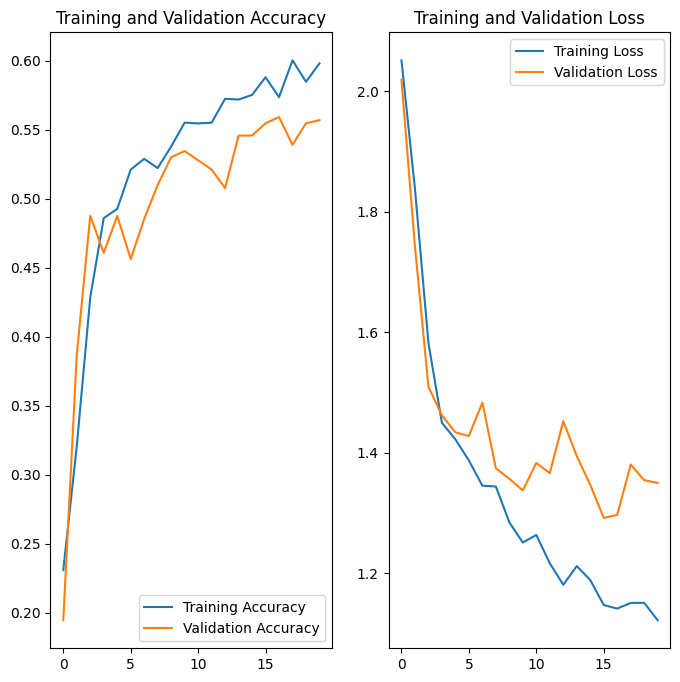

In [28]:
# Visualizing training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Findings:


*   As the training accuracy increases linearly over time, where as the validation accuracy stall at 52% accuracy in training process.
*   As the training loss decreases with epochs the validation loss increases

*   The plots show that training accuracy and validation accuracy are off by large margins, and the model has achieved around 58% accuracy on the validation set.
*   While the model's performance has slightly improved, it still indicates potential overfitting and suboptimal learning. Let's delve deeper into potential solutions:

# We can clearly see that the overfitting of the model has reduced significantly when compared the earlier models

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

## Class distribution:
Examining the current class distribution in the training dataset

Datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others.

Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.



In [29]:
def class_distribution_count(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(train_data_path)
df

,Class,No. of Image
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


<AxesSubplot:xlabel='No. of Image', ylabel='Class'>

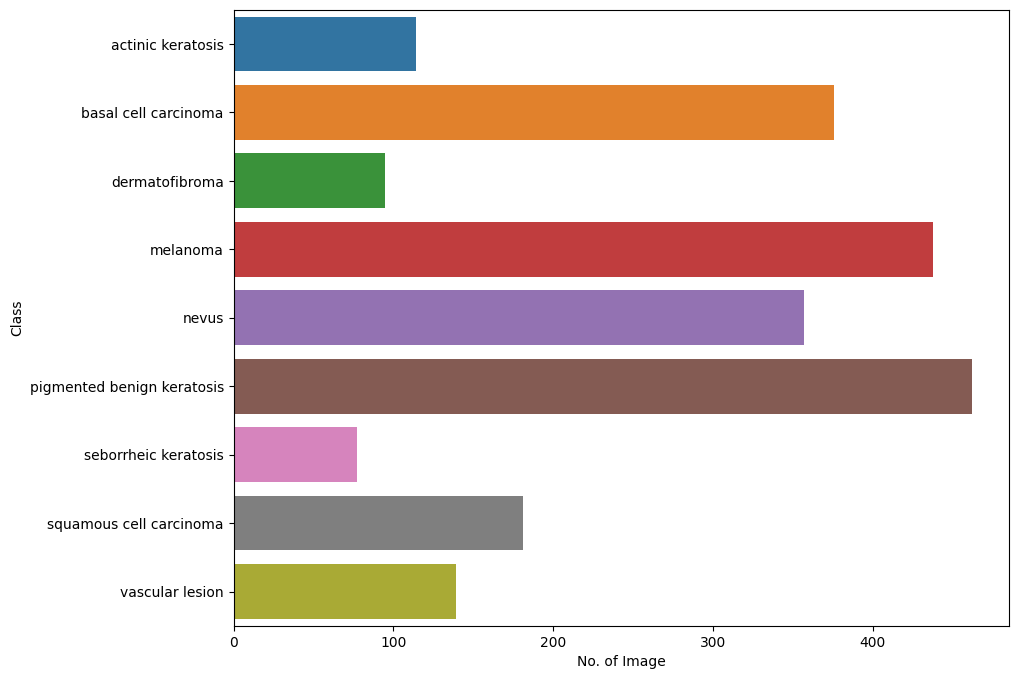

In [30]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")

In [31]:
!pip install Augmentor

In [32]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(train_data_path) + '/' + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)  #Adding 500 samples per class to make sure that none of the classes are sparse

Initialised with 114 image(s) found.
Output directory set to data\Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x19A71158408>: 100%|██████████| 500/500 [00:06<00:00, 81.06 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to data\Train/basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x19B534A2D88>: 100%|██████████| 500/500 [00:06<00:00, 79.06 Samples/s]


Initialised with 95 image(s) found.
Output directory set to data\Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x19A53465F48>: 100%|██████████| 500/500 [00:07<00:00, 70.82 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to data\Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x19A74A8D488>: 100%|██████████| 500/500 [00:31<00:00, 15.68 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to data\Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x19B10D74D08>: 100%|██████████| 500/500 [00:32<00:00, 15.25 Samples/s]                   


Initialised with 462 image(s) found.
Output directory set to data\Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x19AE55BE908>: 100%|██████████| 500/500 [00:06<00:00, 74.65 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to data\Train/seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x19AE7867248>: 100%|██████████| 500/500 [00:15<00:00, 32.56 Samples/s]


Initialised with 181 image(s) found.
Output directory set to data\Train/squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x19A59CF2388>: 100%|██████████| 500/500 [00:06<00:00, 72.59 Samples/s]


Initialised with 139 image(s) found.
Output directory set to data\Train/vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x19A7114BE08>: 100%|██████████| 500/500 [00:07<00:00, 69.39 Samples/s]


In [33]:
#Count total number of image generated by Augmentor.
image_count_train = len(list(train_data_path.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [34]:
# Lets see the distribution of augmented data after adding new images to the original training data.#
# No. of images in each class after generating additional images
df = class_distribution_count(train_data_path)
df

,Class,No. of Image
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


<AxesSubplot:xlabel='No. of Image', ylabel='Class'>

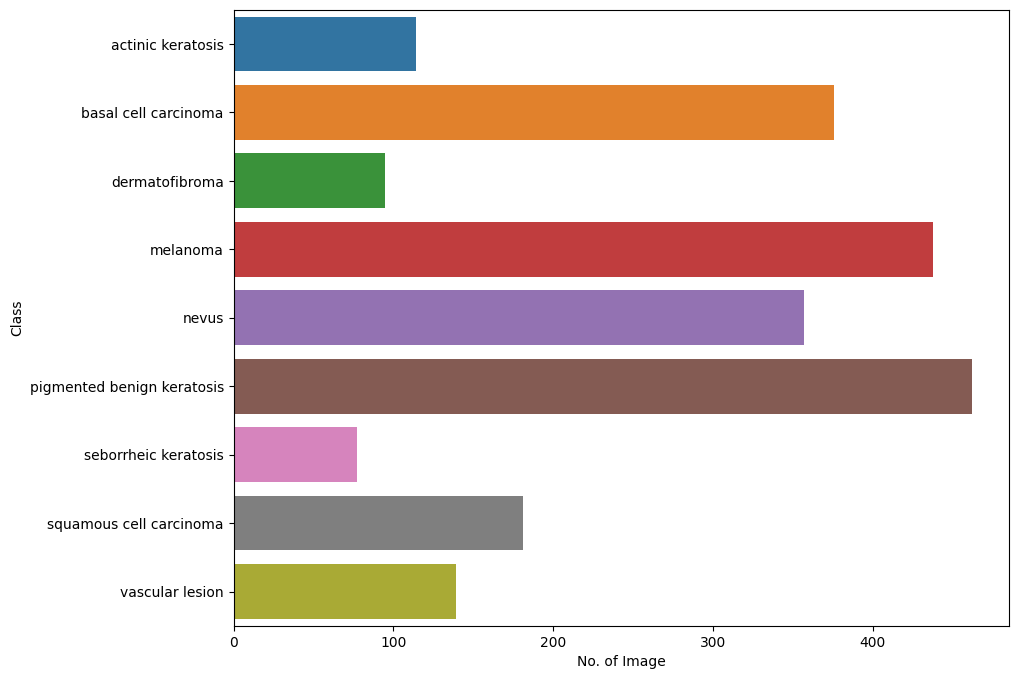

In [35]:
#Visualize the Number of image in each class after generating additional images.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")

In [36]:
# Train dataset
train_ds_data_aug = tf.keras.preprocessing.image_dataset_from_directory(train_data_path, batch_size=32,
                                                               image_size=(180,180), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [37]:
# validation dataset
val_ds_data_aug =tf.keras.preprocessing.image_dataset_from_directory(train_data_path,batch_size=32,
                                                            image_size=(180,180), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [38]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds_data_aug = train_ds_data_aug.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds_data_aug = val_ds_data_aug.cache().prefetch(buffer_size=AUTOTUNE)

In [40]:
for image_batch, labels_batch in train_ds_data_aug:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32, 9)


Model Building & training on the augmented data with Additional Images (Handling class imbalance)


In [52]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

# Define input shape
input_shape = (180, 180, 3)

model = models.Sequential()
model.add(layers.Rescaling(1./255,input_shape=input_shape))

model.add(Conv2D(32,(3,3),activation='relu',input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(layers.Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(layers.Dropout(0.25))

model.add(Dense(9, activation='softmax'))


In [53]:
## Your code goes here
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

#Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])

In [54]:
# View the summary of all layers
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_6 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 45, 45, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 22, 22, 128)      

In [55]:
## Train model for 30 epochs
epochs = 25
history = model.fit(
  train_ds_data_aug,
  validation_data=val_ds_data_aug,
  epochs=epochs,
  callbacks=[checkpoint,earlystop]
)

Epoch 1/25
169/169 [==============================] - 17s 95ms/step - loss: 2.0602 - accuracy: 0.2357 - val_loss: 1.6230 - val_accuracy: 0.4098

Epoch 00001: val_accuracy improved from -inf to 0.40980, saving model to model.h5
Epoch 2/25
169/169 [==============================] - 17s 99ms/step - loss: 1.5230 - accuracy: 0.4145 - val_loss: 1.5110 - val_accuracy: 0.4291

Epoch 00002: val_accuracy improved from 0.40980 to 0.42910, saving model to model.h5
Epoch 3/25
169/169 [==============================] - 15s 87ms/step - loss: 1.4067 - accuracy: 0.4744 - val_loss: 1.3213 - val_accuracy: 0.5122

Epoch 00003: val_accuracy improved from 0.42910 to 0.51225, saving model to model.h5
Epoch 4/25
169/169 [==============================] - 15s 88ms/step - loss: 1.2384 - accuracy: 0.5200 - val_loss: 1.1693 - val_accuracy: 0.5657

Epoch 00004: val_accuracy improved from 0.51225 to 0.56570, saving model to model.h5
Epoch 5/25
169/169 [==============================] - 15s 87ms/step - loss: 1.1256 

### Visualizing the results

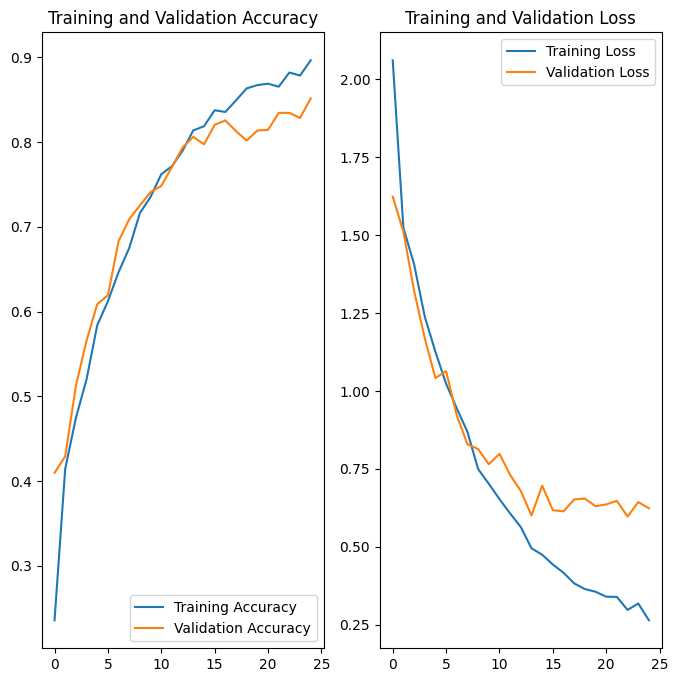

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Conclusion

*   Training Performance: The model achieves a high training accuracy of 0.9104 and a low loss of 0.2299, indicating strong performance on the training data.
*   Validation Performance: While the validation accuracy of 0.8337 is also good there's a noticeable gap between the training and validation accuracy. This suggests potential overfitting
*   At epoch 17 model had training accuracy of 0.84 with loss 0.4156 and validation accuracy of 0.82 with loss 0.6408. Which shows no significant overfitting
*   Class rebalancing not only got rid of overfitting it also improved the accuracy from 58% to 83%


Model Prediction

Actual Class nevus
Predictive Class nevus


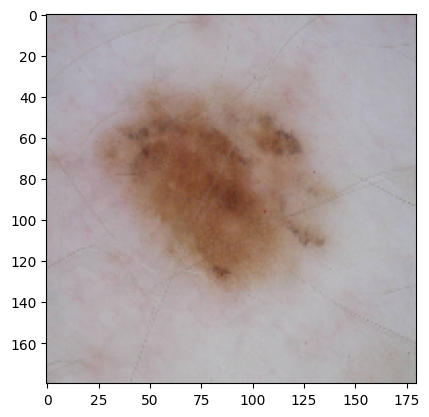

In [76]:
from glob import glob
Test_image_path = os.path.join(test_data_path, class_names[4], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[4] +'\n'+ "Predictive Class "+ pred_class )